# Prueba Técnica - Tigo - Dataset: Polizas sector Automotriz 

![Baner_imagen](https://i.ibb.co/W5z8cJ5/atencion-cliente-tigo-825x293.png)


**Carolina Piedrahita | Analista de datos | Data Scientist**
* Correo: cpiedrahita142@gmail.com
* Linkedin: www.linkedin.com/in/carolina-piedrahita
* Github: https://github.com/CarolinaPiedrahita/tigopruebratecnica
* Nro: +57 310 285 47 73
---


## 0.- Importación de librerias


In [ ]:
import pandas as pd # Manejo de data estructurada (Dataframe)
import numpy as np #Manejo de matrices
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns  #Gráficas sencillas

from sklearn.model_selection import train_test_split # Separar datos en Train(Entrenamiento) y Test(Prueba)

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [ ]:
#seed=2021 # Una semilla se usa para que el modelo sea replicable

**FUNCIONES GENERALES**

In [ ]:
def analisisNumericas(df, variable):
  # fig, ax = plt.subplots(1, 2,figsize=(12, 4))
  # ax[0].hist(df[variable], bins=25)
  # ax[1].boxplot(df[variable],0, 'gD')
  # plt.show()

  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4),color="#CABDE9")
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

def analisisCategoricas(df, variable):
  frecuencia_absoluta = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(dropna = False))
  frecuencia_absoluta.columns = ['FREC_ABS'] 
  frecuencia_relativa = pd.DataFrame(df[variable].astype('str').fillna('Nulo').value_counts(normalize = True, dropna = False))
  frecuencia_relativa.columns = ['FREC_REL'] 
  tablaResumen = pd.concat([frecuencia_absoluta,frecuencia_relativa], axis = 1)
  display(tablaResumen)
  tablaResumen
  plt.bar(x = tablaResumen.index, height = tablaResumen['FREC_ABS'], color="#CABDE9")
  for i, txt in enumerate(tablaResumen['FREC_ABS']):
    plt.annotate(str(txt), (i, txt), fontsize = 12)
  plt.twinx()
  plt.plot(tablaResumen['FREC_REL'], linestyle='-', linewidth=2.0, color='red')
  plt.ylim(0, 1)
  for i, txt in enumerate(tablaResumen['FREC_REL']):
    plt.annotate(str(round(txt * 100, 1)) + '%', (i, txt), fontsize = 12, ha='center')
  plt.show()

## 1.- Comprensión del Negocio

Una empresa del sector automotriz Colombiano desea a través de un estudio responder a las siguientes preguntas: 

*   ¿Cómo es el comportamiento de la Prima Anual?
*   ¿Cómo se encuentra compuesta la base de datos en términos de edad y ocupación?
*   ¿Existen valores faltantes o valores atípicos? ¿Qué método propones para corregir esto?

Y adicional se busca generar un modelo para predecir el valor de la prima anual que se cobra por cada tipo de vehículo.

## 2.- Comprensión de los datos

**En esta etapa nos avocaremos a conocer todo lo referente a los datos con los que contamos**

Las características y coberturas son: 

*   ID: Identificador fila
*   Tipo póliza: pólizas Nuevas o renovadas
*   Valor Asegurado: Suma total de los valores asegurados de cada una de las coberturas de la póliza.
*   Fecha Emisión: Fecha en la que se emite la póliza.
*   Fecha Inicio: Fecha en que inicia la cobertura del vehículo.
*   Fecha fin: Fecha en que termina la cobertura del vehículo.
*   Valor prima Anual: Costo total anualizado de las coberturas otorgadas por la aseguradora de cada póliza expedida.
*   Valor asegurado Vehículo: Valor asegurado del casco del vehículo de acuerdo con la Guía de valores de Fasecolda.
*   Ciudad: Ciudad de circulación del vehículo.
*   Departamento: Departamento de circulación del vehículo.
*   Ocupación: Ocupación del asegurado.
*   Edad: Edad del Asegurado.
*   Características guía de valores Fasecolda:
1. MARCA
2. REF1
3. REF2
4. REF3
5. CLASE
*  	Modelo del vehículo: Año del modelo del vehículo de acuerdo con la tarjeta de propiedad.
*   Color: Color del vehículo de acuerdo con la tarjeta de propiedad.
*  Años de no reclamación: Número de años en que el asegurado no ha presentado siniestros.
*   Género: Genero del asegurado.
*   Deducibles: Plan de deducible escogido por el asegurado en caso de sufrir un accidente o una pérdida.



### 2.1.- Recopilación de los Datos


In [ ]:
# contenedor google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PruebaTecnicaTigo/SectorAutomotrizColombia.csv', index_col=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.shape
# INTERPRETACION:
# 120930 observaciones | registros o filas
# 23 variables | features o columnas

(120800, 23)

In [ ]:
# df.info()

In [ ]:
target = 'ValorprimaAnual'

In [ ]:
df[target].value_counts()
# Quienes llenaron esta tabla, identificaron los valores faltantes como "-". Por razones de tiempo de computo y conveniencia, 
# replazaremos estos signos de interrogación por NaN, usando numpy y el método replace()

0          10792
655000      1486
656000       746
635000       729
1035000      581
           ...  
562619         1
699836         1
83136          1
766427         1
61250          1
Name: ValorprimaAnual, Length: 84846, dtype: int64

In [ ]:
# Reemplazamos "-" por NaN
df.replace("-", np.nan, inplace = True) 
df.replace(" ", np.nan, inplace = True) 
df.replace("PERSONA JURIDICA", np.nan, inplace = True) 
df.replace('#N/D', np.nan, inplace = True) 

In [ ]:
df['MARCA_TIPO'].value_counts()
#Se realiza un conteo por tipo de vehículo 
#podemos observar que la mayor cantidad de tipo de vehículos corresponde al CHEVROLET SPARK [3] GT [M300]  con 3215 registros.

CHEVROLET SPARK [3] GT [M300]     3212
CHEVROLET SPARK [2] LT [M200]     2884
KIA PICANTO ION XTR 1.25 MT 12    2876
RENAULT LOGAN F.II ENTRY [FAMI    2062
RENAULT DUSTER EXPRESSION MT 1    1972
                                  ... 
VOLKSWAGEN TRANSPORTER T4 KOMB       1
VOLVO C30 2.4i AT 2400CC             1
VOLVO S60 [2] T4 PREMIUM MT 16       1
HYUNDAI TIBURON [1] FX MT 2000       1
SUBARU IMPREZA [1] 1.6 [GF] MT       1
Name: MARCA_TIPO, Length: 2187, dtype: int64

In [ ]:
df['COLOR'].value_counts()
#Se realiza un conteo por tipo de color. 
#podemos observar que el color más usual es el GRIS con 17534 registros.

GRIS                      17502
PLATA                     14392
BLANCO                    11909
NEGRO                      8508
ROJO                       7947
                          ...  
GRIS GALAPALO                 1
PLATA INTENSO                 1
ROJO SHIRAZ METALIZADO        1
ROJO AVELVET                  1
GRSI                          1
Name: COLOR, Length: 2625, dtype: int64

### 2.2 Identificación y conteo de valores faltantes:

Voy aplicar el método `isnull()` y a utilizar la función de agregación `sum()` para identificar los valores faltantes por variable

In [ ]:
datos_faltantes = df.isnull().sum()
datos_faltantes

ID                            0
Tipopoliza                    0
ValorAsegurado                0
FechaInicio                   0
Fechafin                      0
TiempoPermanencia             0
ValorprimaAnual               0
ValoraseguradoVhiculo         0
Ciudad                      274
DEPARTAMENTO                286
OCUPACION                  1998
EDAD                          0
MARCA_TIPO                    0
MARCA                         0
REF1                          0
REF2                       4656
REF3                       4656
CLASE                         0
ModelodelVehiculo             0
COLOR                       201
Anosdenoreclamacion           0
GENERO                        0
DEDUCIBLES               115471
dtype: int64

De acuerdo a la información anterior tenemos los siguientes datos faltantes.
<ol>
    <li>"Ciudad": 274 </li>
    <li>"Departamento": 286 </li>
    <li>"Edad": 11676 </li>
    <li>"MARCA_TIPO" : 1 </li>
    <li>"COLOR": 201 </li>
    <li>"Anosdenoreclamacion": 45532 </li>
    <li>"DEDUCIBLES": 115471 </li>
</ol>

#### 2.2.1 Tratamiento de los datos faltantes

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

Teniendo en cuenta las buenas práctias solo debemos eliminar una columna si la mayoria de entradas son vacias. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas. 

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros. Aplicaremos los siguientes métodos para cada columna:

<b>Reemplazo por la media:</b>
<ul>
    <li>"Edad": 11676 datos faltantes</li>
    <li>"GENERO": 1948 datos faltantes</li>
</ul>
<b>Eliminación de una fila entera:</b>
<ul>
   <li>"MARCA_TIPO": 1 dáto faltante que será eliminada la fila entera [3] GT [M300]". </li>
        <ul>
            <li>Razón: Como, eventualmente, la predicción de el valor anual de la prima se harpa por Marca_tipo, ninguna entrada sin Marca_tipo puede ser usada para una predicción; por ende, cualquier fila sin Marca_tipo no será útil.</li>
        </ul>
    </li>
</ul>

In [ ]:
df["EDAD"].replace(np.nan, "43", inplace=True)

In [ ]:
df["GENERO"].replace(np.nan, "FEMENINO", inplace=True)

In [ ]:
df["OCUPACION"].replace(np.nan, "INDEPENDIENTE", inplace=True)

In [ ]:
# Eliminación de columnas sin MARCA_TIPO mediante dropna
df.dropna(subset=["MARCA_TIPO"], axis=0, inplace=True)
# Eliminación de columnas sin ModelodelVehiculo
df.dropna(subset=["ModelodelVehiculo"], axis=0, inplace=True)
# Reinicio de los indices
df.reset_index(drop=True, inplace=True)

In [ ]:
# Eliminación de columnas sin Valorprimaanul mediante dropna
df.dropna(subset=["ValorprimaAnual"], axis=0, inplace=True)

In [ ]:
# Eliminamos columnas que no nos aportan información relevante
df = df.drop(['ID'], axis=1) #ID no nos dice nada acerca del valor de la prima anual
#Fecha de inicio y Fecha fin ya estan relacionadas  y contenidas en el campo
#nuevo que se creo llamado TiempoPermanencia que es la resta entre Fecha Fin - Fecha Inicio
df = df.drop(['FechaInicio'], axis=1)
df = df.drop(['Fechafin'], axis=1)
#Ciudad y departamento son variables en las que por cuestiones de tiempo
#he decidido no enfocarme
df = df.drop(['Ciudad'], axis=1)
df = df.drop(['DEPARTAMENTO'], axis=1)
#Los campos REF1,REF2,REF3; se eliminan porque ya estan contenido en Marca_Tipo
df = df.drop(['REF1'], axis=1)
df = df.drop(['REF2'], axis=1)
df = df.drop(['REF3'], axis=1)
#Color, genero y deducibles son variables en las que por cuestiones de tiempo no me voy a enfocar
df = df.drop(['COLOR'], axis=1)
df = df.drop(['GENERO'], axis=1)
df = df.drop(['DEDUCIBLES'], axis=1)

In [ ]:
#Marca ya esta contenida en Marca_tipo
df = df.drop(['MARCA'], axis=1)


In [ ]:
#aparencia de la tabla luego de procesarla
df.head()

,Tipopoliza,ValorAsegurado,TiempoPermanencia,ValorprimaAnual,ValoraseguradoVhiculo,OCUPACION,EDAD,MARCA_TIPO,CLASE,ModelodelVehiculo,Anosdenoreclamacion
0,Renovacion,684689000,366,782949,18800000,EMPLEADO(A),45,CHEVROLET AVEO FAMILY MT 1500C,AUTOMOVIL,2010,DOS AÑOS CONTINUOS
1,Nuevo,965205600,366,715824,24900000,EMPLEADO(A),41,CHEVROLET AVEO EMOTION 1.6L MT,AUTOMOVIL,2009,CUATRO O MAS AÑOS
2,Nuevo,640605600,366,740816,12600000,INDEPENDIENTE,33,RENAULT CLIO II F.II EXPRESSIO,AUTOMOVIL,2002,TRES AÑOS CONTINUOS
3,Nuevo,655605600,366,745224,20100000,EMPLEADO(A),50,CHEVROLET AVEO EMOTION 1.6L MT,AUTOMOVIL,2006,DOS AÑOS CONTINUOS
4,Renovacion,1270169000,366,771465,14600000,EMPLEADO(A),38,CHEVROLET SPARK [2] LT [M200],AUTOMOVIL,2009,TRES AÑOS CONTINUOS


### 2.3 Corrección de datos

<p>Cómo un último paso en el preprocesado de los datos se pasa a  revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

In [ ]:
df.dtypes

Tipopoliza               object
ValorAsegurado            int64
TiempoPermanencia         int64
ValorprimaAnual           int64
ValoraseguradoVhiculo     int64
OCUPACION                object
EDAD                      int64
MARCA_TIPO               object
CLASE                    object
ModelodelVehiculo         int64
Anosdenoreclamacion      object
dtype: object

Se puede observa que algunas columnas no tienen el tipo correcto.

Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con caracteres, como categorias, deben ser del tipo 'object'. Por ejemplo, 'EDAD' es variable numéricas esperamos entonces que sea de tipo 'int'; no obstante, es de tipo 'object'. Debemos convertirla a un tipo adecuado usando el método "astype()"

In [ ]:
df[["EDAD"]] = df[["EDAD"]].astype("int")

In [ ]:
df[["ModelodelVehiculo"]] = df[["ModelodelVehiculo"]].astype("int")

Adicional hay campos cuya utilidad sería mayor si los trasnformamos a una variable númerica

In [ ]:
Anosdenoreclamacion = 'Anosdenoreclamacion'

In [ ]:
#Transformamos la variable Anosdenoreclamacion  a una variable númerica
# MENOS DE UN AÑO=0, UN AÑO CONTINUO=1, DOS AÑOS CONTINUOS=2, TRES  AÑOS CONTINUOS=3, CUATRO O MAS AÑOS=4
df[Anosdenoreclamacion] = df[Anosdenoreclamacion].replace(['MENOS DE UN AÑO','UN AÑO CONTINUO','DOS AÑOS CONTINUOS','TRES  AÑOS CONTINUOS','CUATRO O MAS AÑOS'],[0,1,2,3,4])

In [ ]:
df["Anosdenoreclamacion"].replace(np.nan, "0", inplace=True)

In [ ]:
df[["Anosdenoreclamacion"]] = df[["Anosdenoreclamacion"]].astype("int")

In [ ]:
df.dtypes

Tipopoliza               object
ValorAsegurado            int64
TiempoPermanencia         int64
ValorprimaAnual           int64
ValoraseguradoVhiculo     int64
OCUPACION                object
EDAD                      int64
MARCA_TIPO               object
CLASE                    object
ModelodelVehiculo         int64
Anosdenoreclamacion       int64
dtype: object

### 2.4 Exploración de los Datos

El análisis exploratorio de datos (EDA del inglés Exploratory Data Analysis) se realiza con el fin de:

<ol>
  <li>Resumir las principales características del conjunto de datos.</li>
  <li>Entender mejor el conjunto de datos que se está tratando.</li>
  <li>Establecer relaciones entre variables.</li>
  <li>Determinar si una variables es un buen predictor de una variable blanco.</li>
  <li>Extraer las variables más importantes.</li>
</ol>

**Objetivo:** Determinar las características que más impactan en el valor de la prima Anual.

Para abordar el análisis exploratorio de datos, es útil aplicar las siguientes técnicas:

<ol>
  <li> Estadística descriptiva</li>
  <li> Agrupamiento de datos</li>  
  <li> Correlación (Mapas de correlación)</li>
</ol>



Antes de ponernos en la tarea de construir un modelo que pretenda predecir alguna característica del conjunto de datos, es importante realizar una exploración de los datos. La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

<ol>
  <li>Métodos: <code>.describe()</code>, el cual permite obtener un resumen estadístico de las <b>variables numéricas</b> en <code>pandas</code>, o la función <code>.value_counts()</code>, la cual permite contabilizar variables categóricas .</li>
    <li>Box plots. </li>
    <li>Gráficos de dispersión. </li>
</ol>

###Definición de variables categoricas y númericas

In [ ]:

# Definimos las variables que trataremos como numericas y como categoricas de nuesto dataset generado
varCategoricas = ['Tipopoliza','OCUPACION','CLASE']
varNumericas = ['ValorprimaAnual','ValorAsegurado','ValoraseguradoVhiculo','EDAD','ModelodelVehiculo','Anosdenoreclamacion','TiempoPermanencia'] 

#### Sacamos el analisis categorico para cada variable

-------------------------------------------------- Tipopoliza --------------------------------------------------


,FREC_ABS,FREC_REL
Nuevo,78662,0.651175
Renovacion,27137,0.224644
Modificación,15001,0.124180


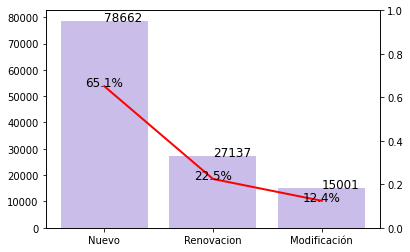




-------------------------------------------------- OCUPACION --------------------------------------------------


,FREC_ABS,FREC_REL
EMPLEADO(A),92592,0.766490
INDEPENDIENTE,21844,0.180828
PENSIONADO(A),5261,0.043551
ESTUDIANTE,1103,0.009131


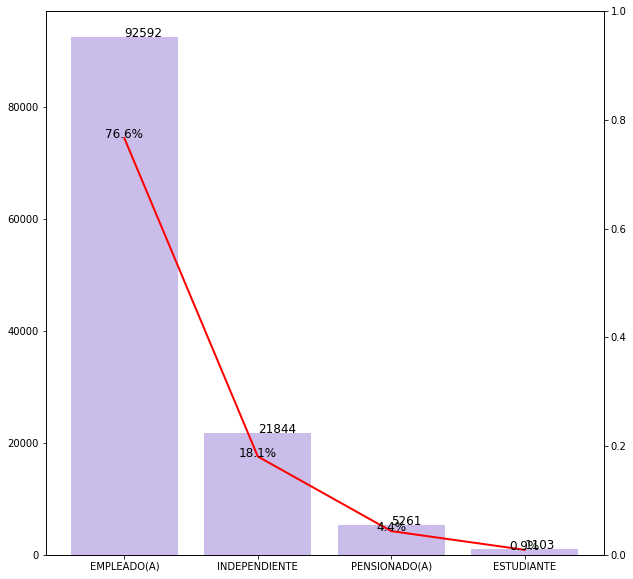




-------------------------------------------------- CLASE --------------------------------------------------


,FREC_ABS,FREC_REL
AUTOMOVIL,87691,0.725919
CAMIONETA PASAJ.,17797,0.147326
CAMPERO,8641,0.071531
PICKUP DOBLE CAB,6061,0.050174
PICKUP SENCILLA,610,0.005050


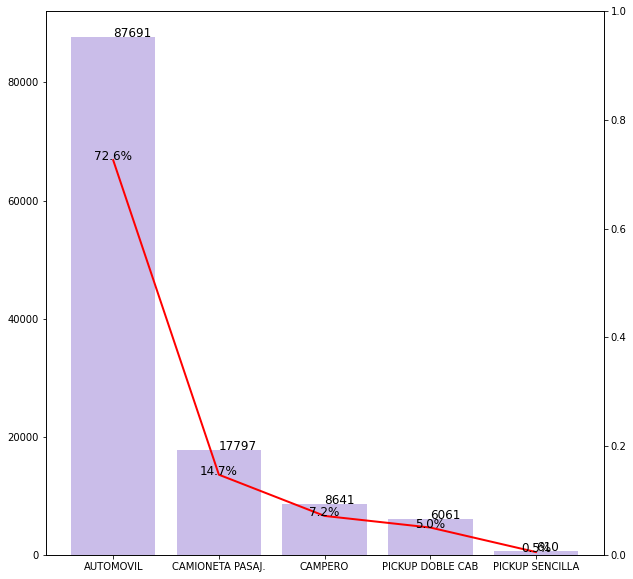

<Figure size 720x720 with 0 Axes>

In [ ]:
#Sacamos el analisis categorico para cada variable
for categorica in varCategoricas:
    print("-"*50,categorica,"-"*50)
    analisisCategoricas(df, categorica)
    plt.figure(figsize=(10,10))
    print("\n\n")

#### Interpretación Variables Categoricas:
* 65.1% de lo clientes tienen categoría de Nuevo en la poliza.
* La mayoría de los clientes que han accedido a la poliza son empleados(as) para este dataset se tienen el 76.6% en esta modalidad.
* La clase de autos que más acceden a la poliza son Automoviles representando en el dataset el 72.6%

#### Sacamos el analisis númerico para cada variable

############################## ValorprimaAnual ##############################
                     Histograma                     


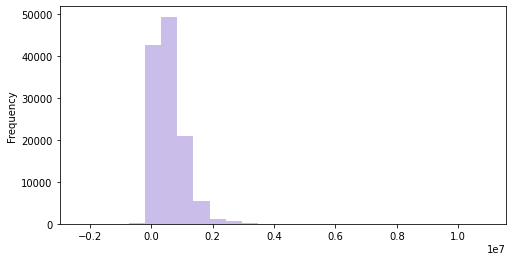



                     Boxplot                     


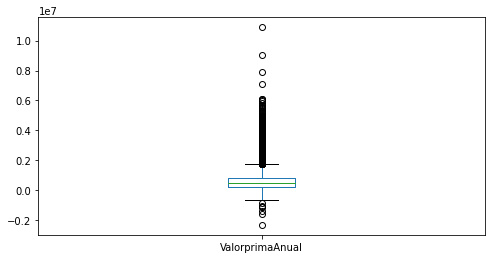




############################## ValorAsegurado ##############################
                     Histograma                     


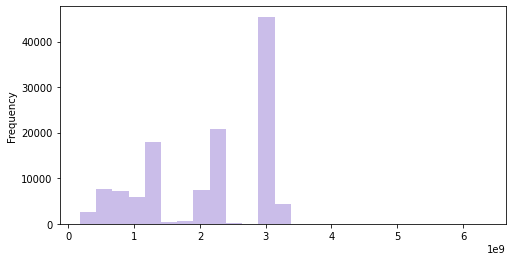



                     Boxplot                     


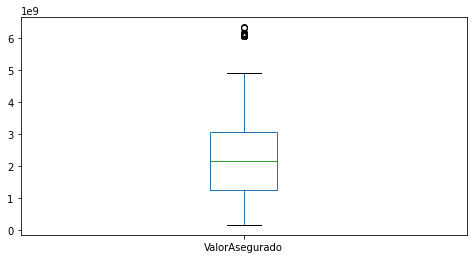




############################## ValoraseguradoVhiculo ##############################
                     Histograma                     


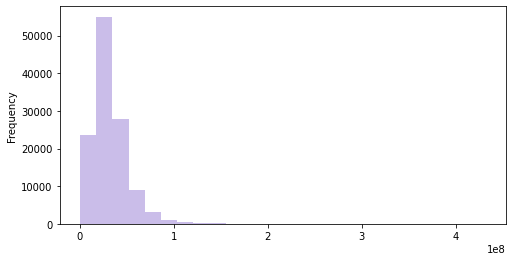



                     Boxplot                     


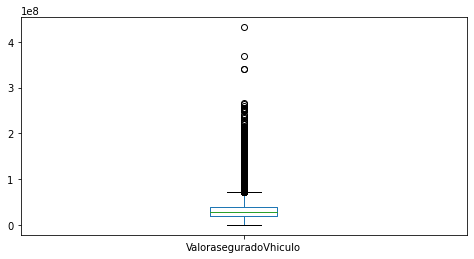




############################## EDAD ##############################
                     Histograma                     


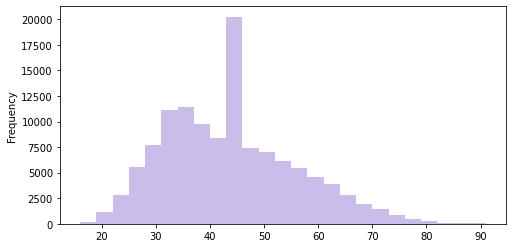



                     Boxplot                     


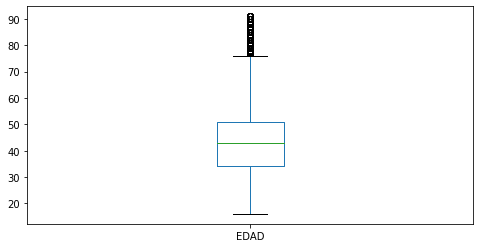




############################## ModelodelVehiculo ##############################
                     Histograma                     


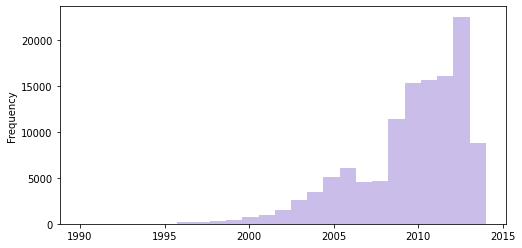



                     Boxplot                     


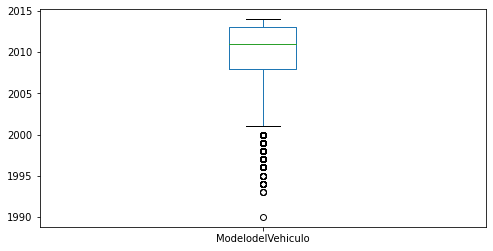




############################## Anosdenoreclamacion ##############################
                     Histograma                     


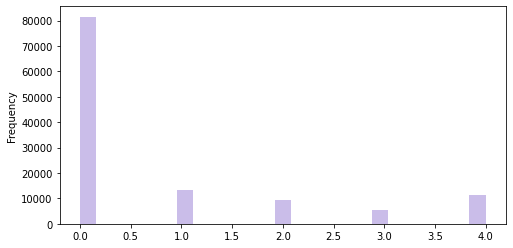



                     Boxplot                     


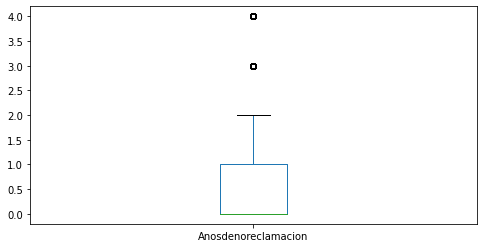




############################## TiempoPermanencia ##############################
                     Histograma                     


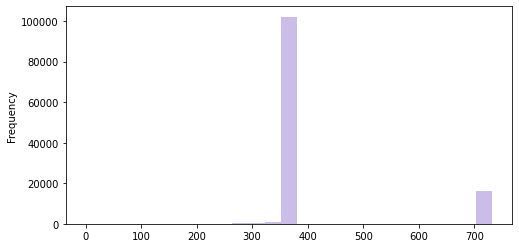



                     Boxplot                     


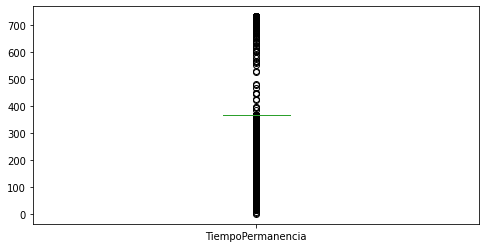

<Figure size 720x720 with 0 Axes>

In [ ]:
for numerica in varNumericas:
  print("#"*30,numerica,"#"*30)
  analisisNumericas(df, numerica)
  plt.figure(figsize=(10,10))
  print("\n\n")

#### Interpretación Variables Númericas

**Comentario:** Del análisis de las variables numericas se puede observar lo siguiente:
1. **Edad del cliente:** Sigue una distribución normal, posee varios outlier por lo cual podriamos eliminarlos o reemplazarlos por el percentil 90
2. **Valor prima Anual:** Se observa que no sigue una distribución normal y posee outliers superiores e inferiores.
3. **Valor asegurado:** No sigue una distribución normal, posee outliers superiores.
4. **ValoraseguradoVhiculo:**  No posee una distribucion normal, posee outliers superiores.
5. **ModelodelVehiculo:** Gráficamente se observa que no posee una distribucción Normal , posee 9 outliers inferiores.
6. **Anosdenoreclamacion:** No sigue una distribución normal, posee 2 outliers superiores.
7. **TiempoPermanencia:** Se observa que no sigue una distribución normal y que la mayoría de los clientes permanecen el año con su poliza.


Convertimos variables categoricas a númericas, lenguaje de maquina para correlacionarlas con el valor anual de la prima

In [ ]:
Tipopoliza = 'Tipopoliza'

In [ ]:
#Transformamos la variable Tipopoliza  a una variable númerica
# Modificación=0, Nuevo=1, Renovacion=2
df[Tipopoliza] = df[Tipopoliza].replace(['Modificación','Nuevo','Renovacion'],[0,1,2])

In [ ]:
df[["Tipopoliza"]] = df[["Tipopoliza"]].astype("int")

In [ ]:
OCUPACION = 'OCUPACION'
#Transformamos la variable OCUPACION a una variable númerica
df[OCUPACION] = df[OCUPACION].replace(['INDEPENDIENTE','ESTUDIANTE','EMPLEADO(A)','PENSIONADO(A)'],[0,1,2,3])
df[["OCUPACION"]] = df[["OCUPACION"]].astype("int")

In [ ]:
CLASE = 'CLASE'
#Transformamos la variable CLASE a una variable númerica
df[CLASE] = df[CLASE].replace(['AUTOMOVIL','CAMIONETA PASAJ.','CAMPERO','PICKUP DOBLE CAB','PICKUP SENCILLA'],[0,1,2,3,4])
df[["CLASE"]] = df[["CLASE"]].astype("int")

In [ ]:
df.dtypes

Tipopoliza                int64
ValorAsegurado            int64
TiempoPermanencia         int64
ValorprimaAnual           int64
ValoraseguradoVhiculo     int64
OCUPACION                 int64
EDAD                      int64
MARCA_TIPO               object
CLASE                     int64
ModelodelVehiculo         int64
Anosdenoreclamacion       int64
dtype: object

### Correlaccion de variables con respecto a el valor anual prima

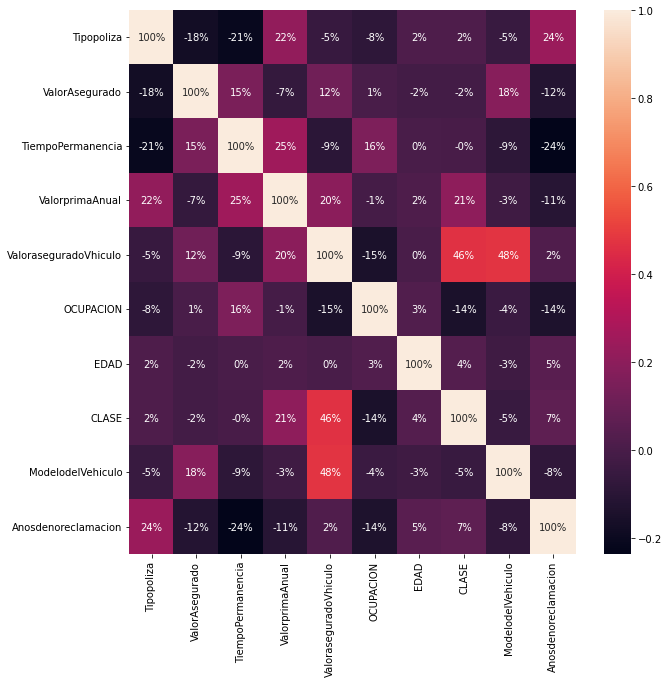

In [ ]:
#Generamos un grafico de calor para ver la relación porcentual que existe
#Entre cada variable 
plt.figure(figsize=(10,10))
sns_plot= sns.heatmap(df.corr(method ='pearson'), annot=True, fmt='.0%')

Observamos la varianza a través de múltiples variables, revelando cualquier patrón, mostrando si las variables son similares entre sí y para detectar si existen correlaciones entre ellas.

Se observa que **los atributos más influyente en los resultados** que cuenta con un 20%, 21%, 22% y 25%  de ocurrencias respecto al atributo Valor prima Anual. 



También podemos observar que los atributos que mayor importancia tienen en el dataset son: 

- Valor asegurado del Vehiculo 20% el cual a su vez tienen dos variables que inciden sobre el directamente el modelo del vehiculo  y la clase del vehiculo

- Tipopoliza también influye en el valor anual de la prima con un valor porcentual de 21%.

- Los años de no reclamación también inciden en el valor anual de la poliza con un valor porcentual del -11% es decir que es inversamente proporcional: A mas años de no reclamaciones menor es el precio del valor anual de la poliza y visceversa. 

La relacion negativa indica que a medida que una variable aumenta la otra disminuye


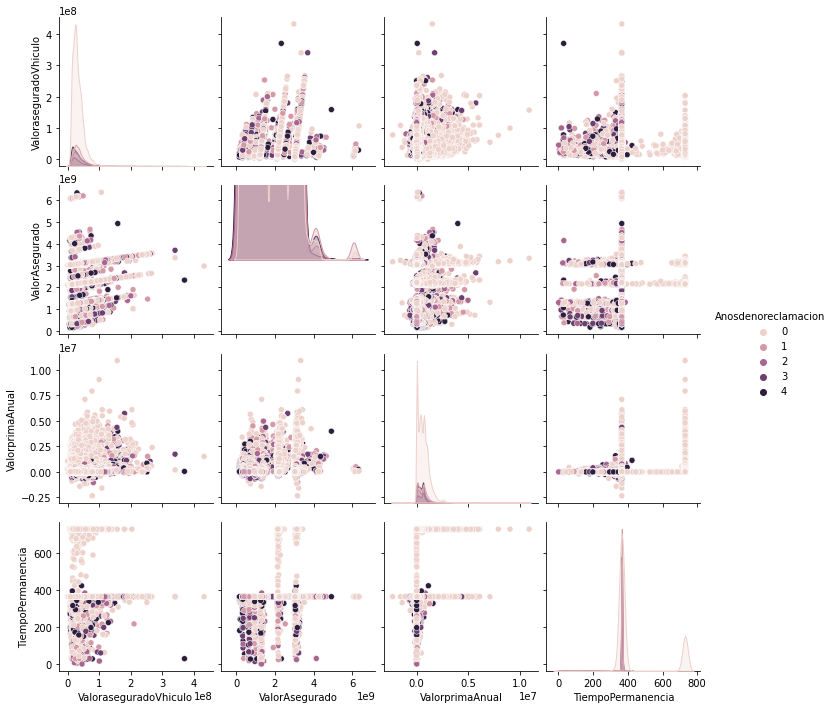

In [ ]:
sns.pairplot(df, hue = "Anosdenoreclamacion", vars = ["ValoraseguradoVhiculo","ValorAsegurado","ValorprimaAnual", "TiempoPermanencia"])

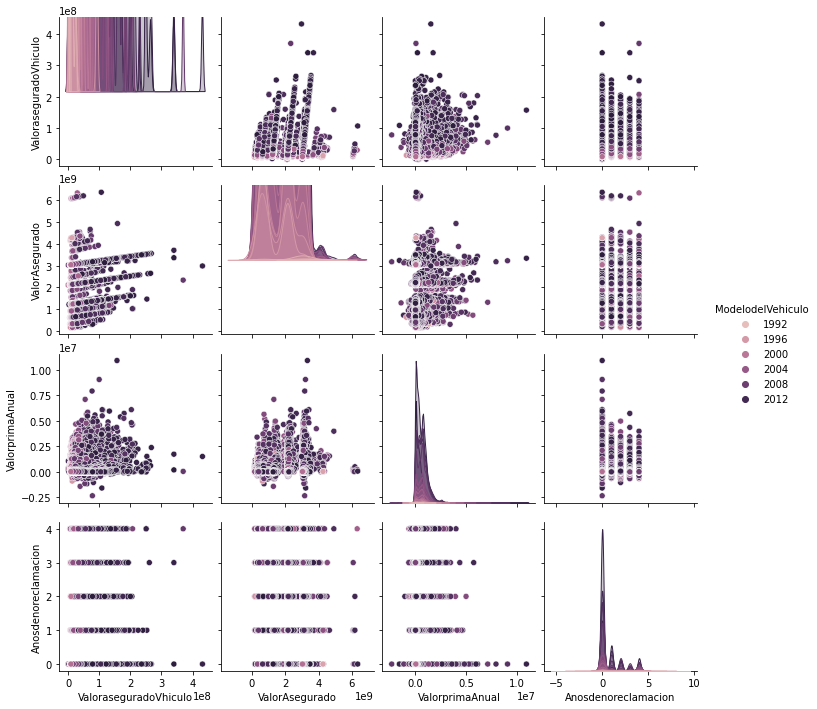

In [ ]:
sns.pairplot(df, hue = "ModelodelVehiculo", vars = ["ValoraseguradoVhiculo","ValorAsegurado","ValorprimaAnual","Anosdenoreclamacion"])

### Tratamiento de Outlier y nulos en el target (valor Prima Anual)

En las graficas anteriores (boxplot), vemos que entre Q1 y Q3 sabemos que están el 50% de los valores obtenidos en el estudio. A esta distancia se le llama rango intercuantílico (IQR: InterQuantile Range).

Para el tratamiento de estos outlier se decide definir una función que reciba como parámetros el conjunto de datos, el umbral inferior y el umbral superior. Y en la función se decide reemplazar por la media aquellos valores atípicos que estén por debajo del umbral inferior, y por la mediana aquellos que estén por encima del umbral superior. Cómo se muestra a continuación:



In [ ]:
# ## Eliminando los outliers de ValorprimaAnual

#target = 'ValorprimaAnual'
## Eliminando los outliers del valorPrimaAnual
Q1_target = df[target].quantile(0.25)
Q3_target = df[target].quantile(0.75)
#se calcula el rango intercuantílico IQR
IQR_target = Q3_target - Q1_target
#Se define como valor atípico leve 
#aquel que dista 1,5 veces el rango intercuantílico por debajo de Q1 o por encima de Q3
inf_target= Q1_target - 1.5 * IQR_target #vamos a calcular cual sería el umbral por abajo
sup_target= Q3_target + 1.5 * IQR_target #vamos a calcular cual sería el umbral por arriba

print('inf_target:',inf_target, 'sup_target:',sup_target)
#Quitando outlier
df=df[(df[target] >= inf_target) & (df[target] <= sup_target)]
print('Tamano despues de filtar los outliers de target: Valor Prima Anual',df.shape)

##Eliminando nulos
df.dropna(inplace=True)
print('Tamano despues de filtar los nulos de target',df.shape)

inf_target: -779405.625 sup_target: 1777711.375
Tamano despues de filtar los outliers de target: Valor Prima Anual (117727, 11)
Tamano despues de filtar los nulos de target (117727, 11)


## 3. Modelamiento

## 3.1 RandomForestRegressor

In [ ]:
X=df.drop([target,'MARCA_TIPO'], axis=1).values
y=df[target].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 33}
r2  tTest: 0.6386187085692279 tTrain: 0.9412696694456519
MAE  tTest: 172893.05012267438 tTrain: 69026.78290052727
RMSE  tTest: 249434.44687512555 tTrain: 100821.19045406014
stdTest: 414928.81576562615 stdTrain: 416026.1200397988 stdAll: 415698.40902162995
ErrorTest: 0.4743465151303478 ErrorTrain: 0.19094412321415952 ErrorAll: 0.472983065178365


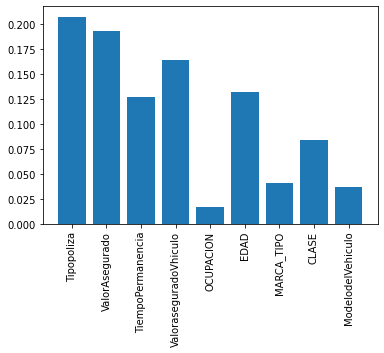

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 34}
r2  tTest: 0.6389531584897761 tTrain: 0.9402562825298274
MAE  tTest: 174120.632755139 tTrain: 69056.35777839417
RMSE  tTest: 250512.70517673178 tTrain: 101476.87143980103
stdTest: 416915.4425603931 stdTrain: 415165.20495648764 stdAll: 415698.40902162995
ErrorTest: 0.47165164282581984 ErrorTrain: 0.19301479600365293 ErrorAll: 0.47502768220274516


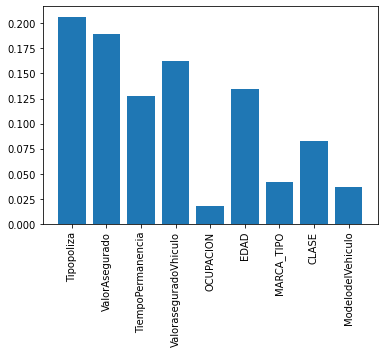

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 31}
r2  tTest: 0.6363526388665033 tTrain: 0.9395103095262793
MAE  tTest: 174372.887469364 tTrain: 70100.2008277959
RMSE  tTest: 251430.06480256782 tTrain: 102107.1806830424
stdTest: 416943.2881977514 stdTrain: 415160.0960815237 stdAll: 415698.40902162995
ErrorTest: 0.47476943957369766 ErrorTrain: 0.1939676813401285 ErrorAll: 0.47676719963161107


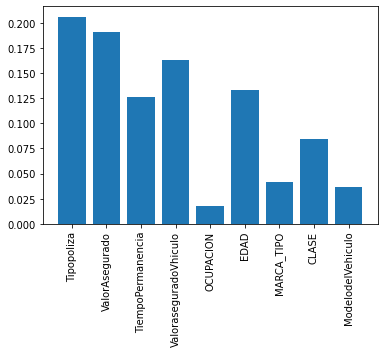

In [ ]:
for rs in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=rs)

    ##Haciendo el barrido de parámetros
    parameters = {'max_depth': np.arange(1,40,1)}
    estimator=GridSearchCV(RandomForestRegressor(n_estimators=100,random_state=rs), parameters, cv=5, iid=True,n_jobs=-1)
    estimator.fit(X,y)
    print(estimator.best_params_)

    ## Entrenando y evaluado el modelo
    reg=RandomForestRegressor(n_estimators=100,max_depth=estimator.best_params_['max_depth'],random_state=rs)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    print ('r2 ','tTest:',r2_score(y_test,y_pred), 'tTrain:',r2_score(y_train,reg.predict(X_train)))
    print ('MAE ','tTest:',mean_absolute_error(y_test,y_pred), 'tTrain:',mean_absolute_error(y_train,reg.predict(X_train)))
    print ('RMSE ','tTest:',np.sqrt(mean_squared_error(y_test,y_pred)), 'tTrain:',np.sqrt(mean_squared_error(y_train,reg.predict(X_train))))
    print ('stdTest:',np.std(y_test),'stdTrain:',np.std(y_train),'stdAll:',np.std(y))
    print ('ErrorTest:', np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y_test), 
           'ErrorTrain:',np.sqrt(mean_squared_error(y_train,reg.predict(X_train)))/np.mean(y_train),
           'ErrorAll:', np.sqrt(mean_squared_error(y_test,y_pred))/np.mean(y))
    ##Graficando el las carateristicas principales
    ejex=range(X.shape[1])
    ejey=reg.feature_importances_
    plt.figure()
    plt.bar(ejex,ejey)
    plt.xticks(ejex,list(df.drop(target,axis=1).columns),rotation=90)
    plt.show()
    plt.close()

## 3.2 Regresión Lineal

In [ ]:
X_lineal=df.drop(['MARCA_TIPO'], axis=1).values
y_lineal=df[target].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#seleccionamos los datos de entrenamiento y prueba
X_lineal_train, X_lineal_test, y_lineal_train, y_lineal_test = train_test_split(X_lineal,y_lineal,test_size=0.3,random_state=3)



In [ ]:
#entrenamos el modelo
linear  = LinearRegression(normalize=True)
linear.fit(X_lineal_train,y_lineal_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Obtengamos ahora los datos predichos por el modelo y calculemos las métricas

In [ ]:
y_lineal_pred = linear.predict(X_lineal_test)

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_lineal_test, y_lineal_pred))
print('MSE: ', metrics.mean_squared_error(y_lineal_test, y_lineal_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_lineal_test, y_lineal_pred)))

MAE:  2.620226658007979e-10
MSE:  1.2685097749886712e-19
RMSE:  3.5616144864213917e-10


Y calculemos el coeficiente de determinación R2

In [ ]:
print('R2: ', metrics.r2_score(y_lineal_test, y_lineal_pred))

R2:  1.0


Se comprueba además si los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo. Mediante un histograma de residuos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


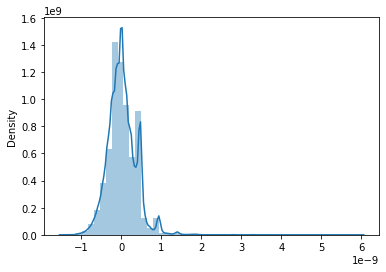

In [ ]:
sns.distplot((y_lineal_test - y_lineal_pred), bins = 50)
plt.show()

Una vez se entrena el modelo de regresión lineal las predicciones se obtienen rápidamente. Se obseva que la complejidad computacional es lineal con respecto a la cantidad de instancias y características sobre las que desea hacer predicciones. En otras palabras, hacer predicciones con el doble de instancias (o el doble de características) tomará aproximadamente el doble de tiempo de computo. En este caso se recomienda seguir probando  diferentes formas de entrenar un modelo de regresión lineal, más adecuado para casos como este donde tenemos una gran cantidad de características o demasiadas instancias de entrenamiento para que quepan en memoria.
